# Air Quality index Data Analysis

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.jagranjosh.com/imported/images/E/GK/CAUSES-AIR-POLLUTION-DELHI.png")

The National Air Quality Index (AQI) was launched in New Delhi on September 17, 2014, under the Swachh Bharat Abhiyan.

https://en.wikipedia.org/wiki/Air_quality_index

-> This dataset is taken from Kaggle with 5 csv files
https://www.kaggle.com/rohanrao/air-quality-data-in-india

1. city_day.csv
2. city_hour.csv
3. station_day.csv
4. station_hour.csv
5. stations.csv

### importing Required Libraries and jupyter settings

In [3]:
!pip install pandas numpy seaborn

In [4]:
import numpy as np
import pandas as pd
from math import pi
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Preparation and Cleaning

In [5]:
dfstation_hour = pd.read_csv("/home/chirag/Documents/csv/station_hour.csv")
dfcity_hour    = pd.read_csv("/home/chirag/Documents/csv/city_hour.csv")
dfstation_day  = pd.read_csv("/home/chirag/Documents/csv/station_day.csv")
dfcity_day     = pd.read_csv("/home/chirag/Documents/csv/city_day.csv")
dfstations     = pd.read_csv("/home/chirag/Documents/csv/stations.csv")

In [6]:
print("List of Columns in each dataframe : ",'\n')
print('dfStation_hour : ',list(dfstation_hour.columns),'\n')
print("dfcity_hour : ",list(dfcity_hour.columns),'\n')
print("dfstation_day : ",list(dfstation_day.columns),'\n')
print("dfCity day : ",list(dfcity_day.columns),'\n')
print("dfStation : ",list(dfstations.columns),'\n')

List of Columns in each dataframe :  

dfStation_hour :  ['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'] 

dfcity_hour :  ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'] 

dfstation_day :  ['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'] 

dfCity day :  ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'] 

dfStation :  ['StationId', 'StationName', 'City', 'State', 'Status'] 



### Missing Values

In [7]:
!pip install missingno

In [8]:
from missingno import matrix

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
<b>   -> matrix from  missingno is the matrix visualization of missing values. !!!  </b>
<br>
<b>  -> White color shows missing values. </b>


Missing Values of : dfstation_hour


<AxesSubplot:>

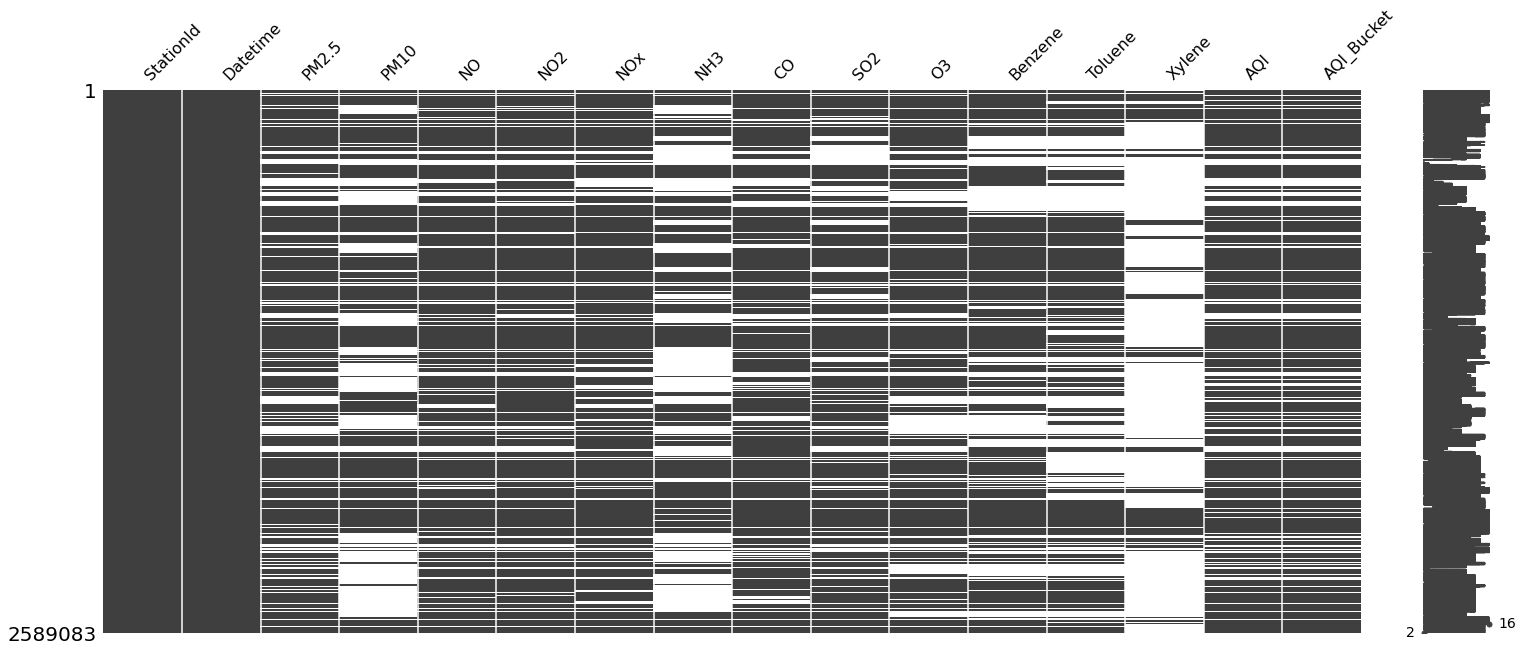

In [9]:
print('Missing Values of : dfstation_hour')
matrix(dfstation_hour)

Missing Values of : dfcity_hour


<AxesSubplot:>

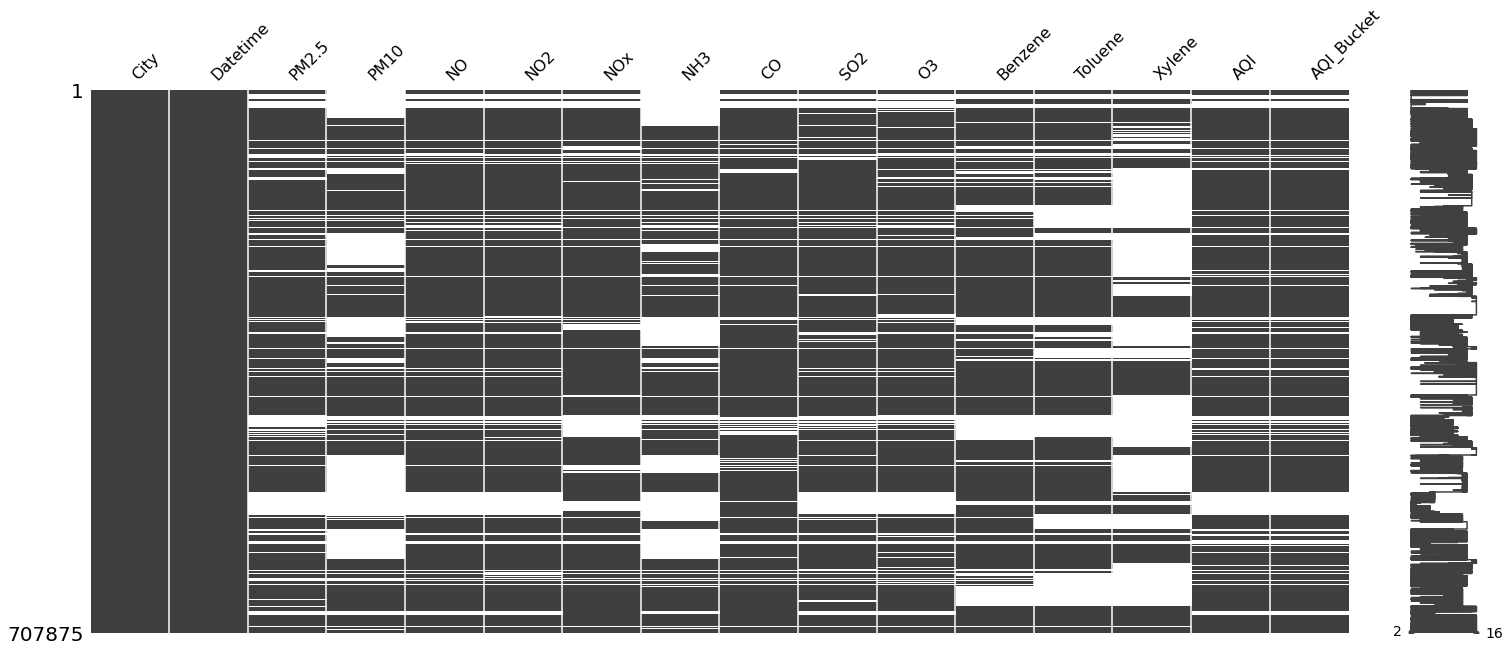

In [10]:
print('Missing Values of : dfcity_hour')
matrix(dfcity_hour)

Missing Values of : dfstation_day


<AxesSubplot:>

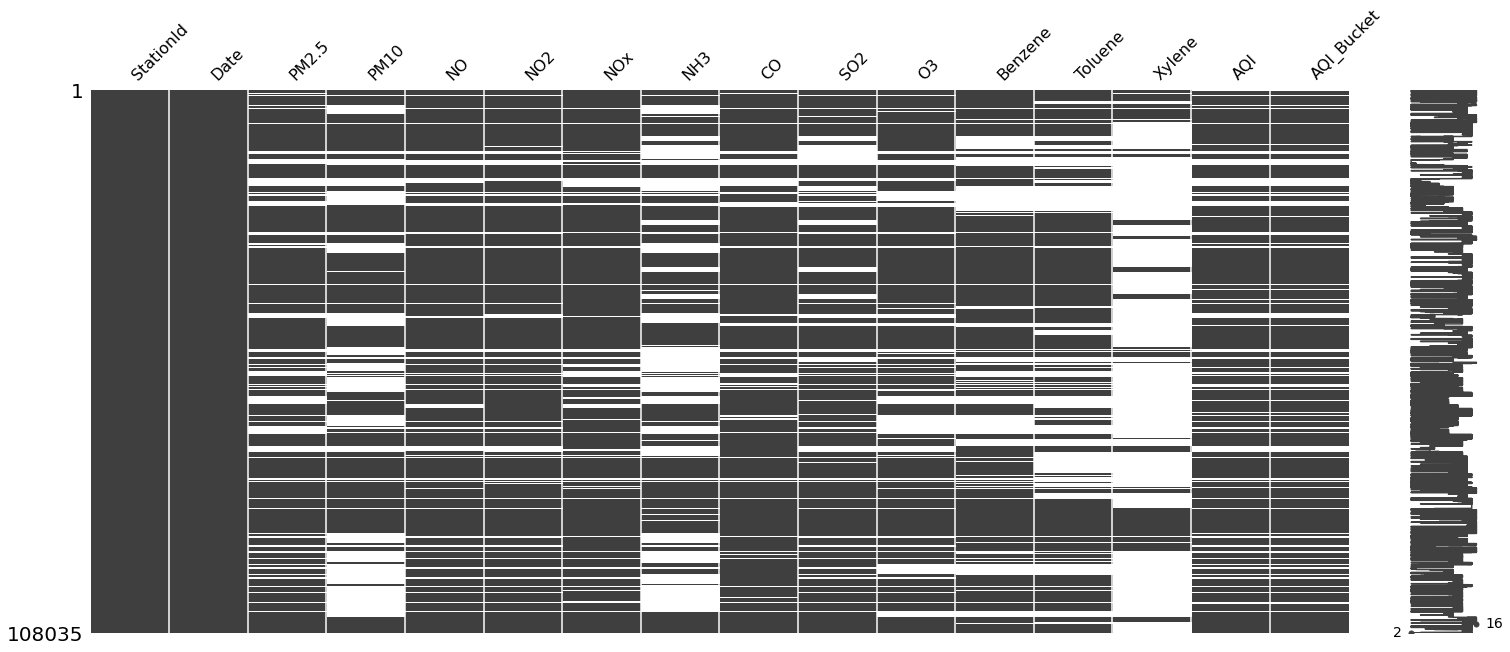

In [11]:
print('Missing Values of : dfstation_day') 
matrix(dfstation_day) 

Missing Values of : dfcity_day


<AxesSubplot:>

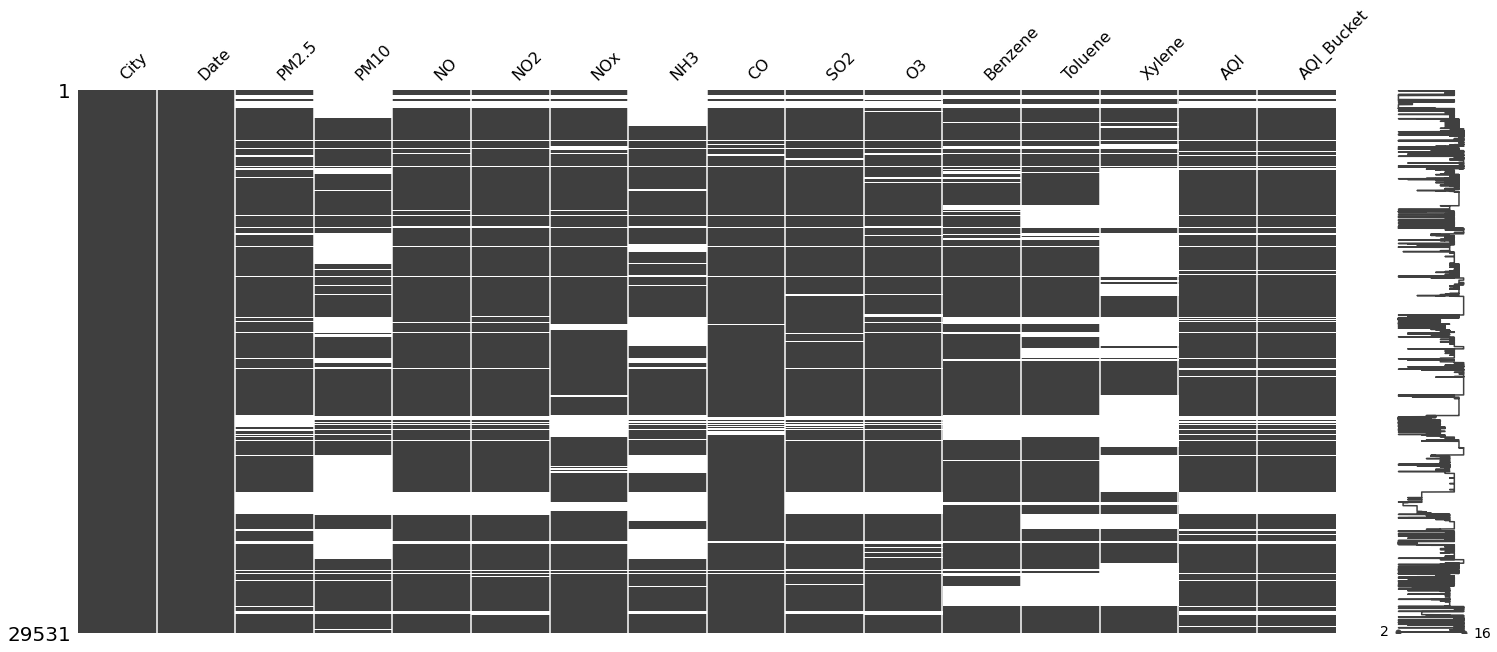

In [12]:
print('Missing Values of : dfcity_day')    
matrix(dfcity_day)

Missing Values of : dfstations


<AxesSubplot:>

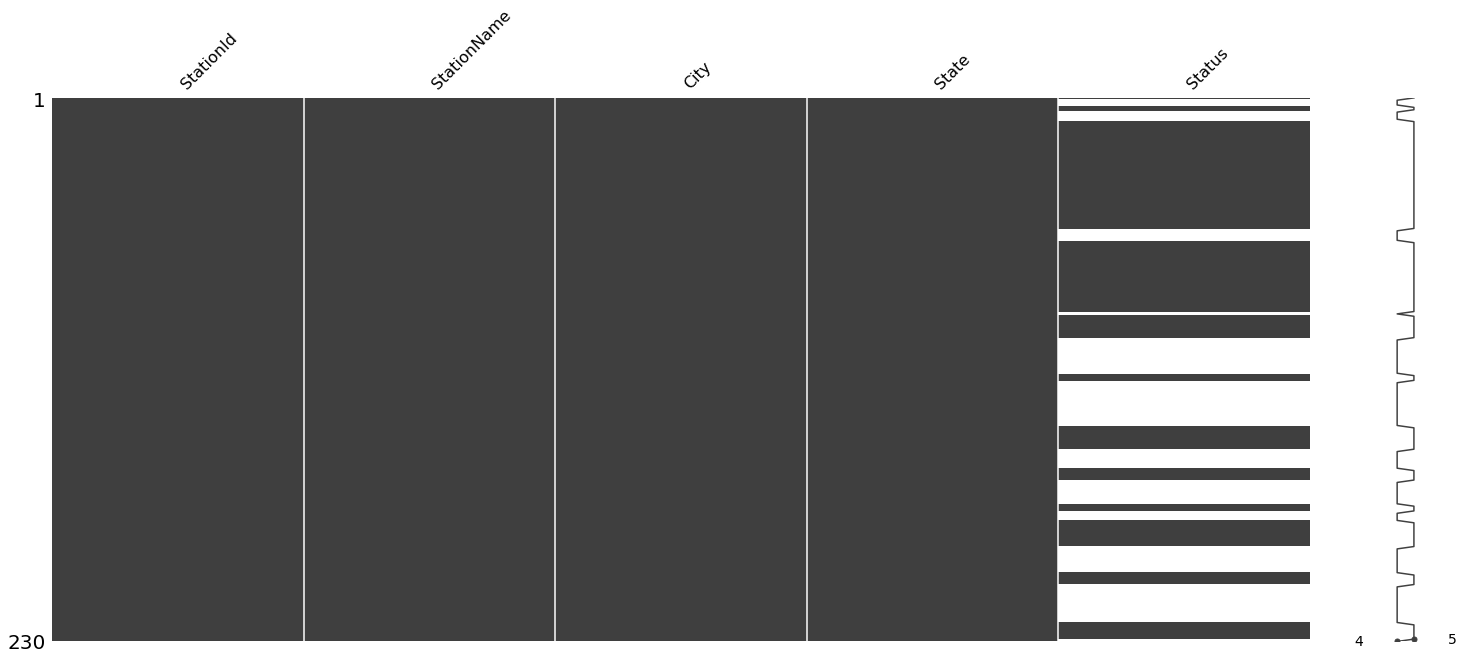

In [13]:
print('Missing Values of : dfstations')    
matrix(dfstations)    

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
<b>   -> DataFrame.isnull().sum() is the method to get missing values in numbers of perticular dataframe. !!!  </b>
<br>

In [14]:
dfstation_hour.isnull().sum()
dfcity_hour.isnull().sum()   
dfstation_day.isnull().sum()
dfcity_day.isnull().sum()
dfstations.isnull().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

StationId       0
StationName     0
City            0
State           0
Status         97
dtype: int64

### Filling Missing Values ( AQI_Bucket and Status Columns)

In [15]:
dfstation_hour.AQI_Bucket = dfstation_hour.AQI_Bucket.fillna('Unknown')
dfcity_hour.AQI_Bucket = dfcity_hour.AQI_Bucket.fillna('Unknown')
dfstation_day.AQI_Bucket = dfstation_day.AQI_Bucket.fillna('Unknown') 
dfcity_day.AQI_Bucket = dfcity_day.AQI_Bucket.fillna('Unknown')

In [16]:
dfstations.Status = dfstations.Status.fillna('Unknown')

## Exploring Stations Dataset

### Count of types of station

<Figure size 720x144 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Status'>

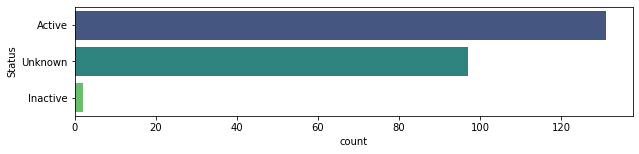

In [17]:
plt.figure(figsize=(10,2))
sns.countplot(y='Status',data = dfstations,palette='viridis')
sns.set(style="whitegrid", font_scale= 1.5)

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
=> Above graph shows, data spread between Active and unknown stations.

### City Wise number of Active stations

<Figure size 504x1224 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='City'>

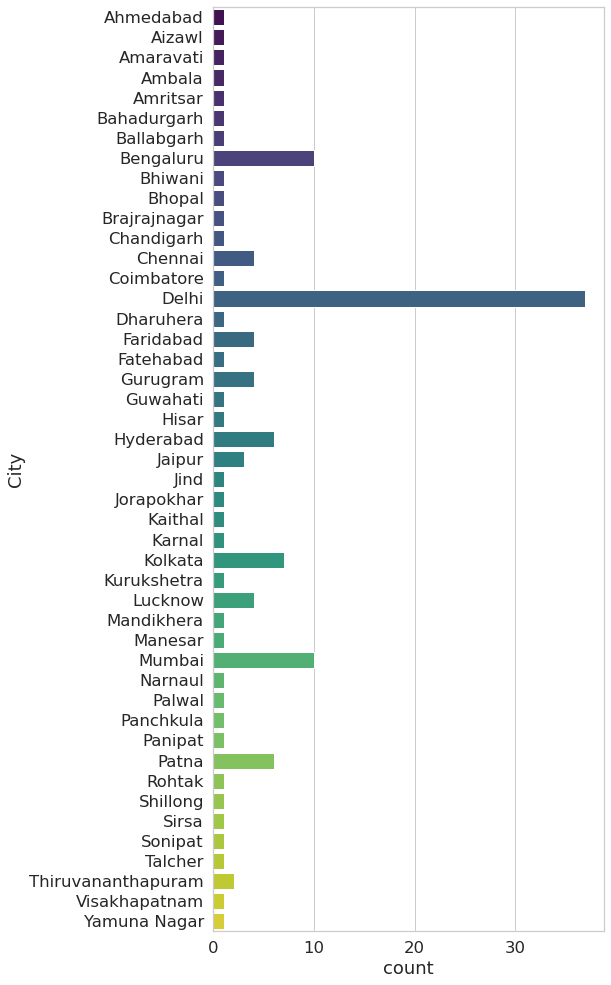

In [18]:
active_station = dfstations[dfstations['Status']=='Active'].sort_values(by='City')
plt.figure(figsize=(7,17))
sns.countplot(y='City',data = active_station,palette='viridis')
sns.set(style="whitegrid", font_scale=1.5)

### Top 5 station with number of Active stations

In [19]:
active_station['City'].value_counts().nlargest(5)

Delhi        37
Bengaluru    10
Mumbai       10
Kolkata       7
Hyderabad     6
Name: City, dtype: int64

### City Wise number of Inactive stations

<Figure size 720x144 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='City'>

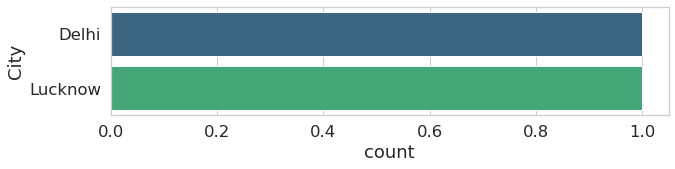

In [20]:
inactive_station = dfstations[dfstations['Status']=='Inactive'].sort_values(by='City')
plt.figure(figsize=(10,2))
sns.countplot(y='City',data = inactive_station,palette='viridis')
sns.set(style="whitegrid", font_scale=1.5)

### City Wise number of Unknown stations

<Figure size 504x1440 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='City'>

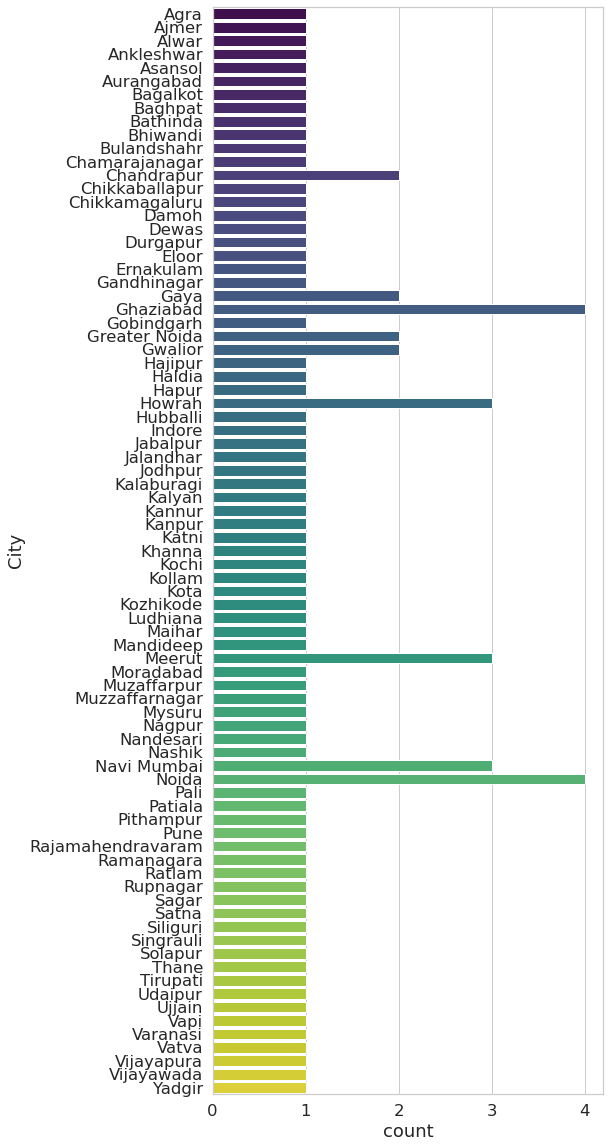

In [21]:
unknown_station = dfstations[dfstations['Status']=='Unknown'].sort_values(by='City')
plt.figure(figsize=(7,20))
sns.countplot(y='City',data = unknown_station,palette='viridis')
sns.set(style="whitegrid", font_scale=1.5)

### Top 5 station with number of unknown stations

In [22]:
unknown_station['City'].value_counts().nlargest(5)

Noida          4
Ghaziabad      4
Meerut         3
Howrah         3
Navi Mumbai    3
Name: City, dtype: int64

## Exploring City Day Dataset

In [23]:
print(len(dfcity_day['City'].unique()),'Cities :',dfcity_day['City'].unique())

26 Cities : ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


In [24]:
print('Start date in Data : ',dfcity_day['Date'].min())
print('End Date in Data   : ',dfcity_day['Date'].max())

Start date in Data :  2015-01-01
End Date in Data   :  2020-07-01


In [25]:
dfcity_day.shape  #No of Rows and columns
dfcity_day.head() # First 5 Rows
dfcity_day.describe() 
dfcity_day['City'].unique() #Get Unique Names of all cities

(29531, 16)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,Unknown
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,Unknown
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,Unknown
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,Unknown
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,Unknown


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

### Fill Missing Data using Linear interpolation

In [26]:
dfcity_day.interpolate(limit_direction="both",inplace=True)
dfcity_day.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

### City Wise Yearly Average Polution data

#### Ahmedabad Yearly Average Polution data

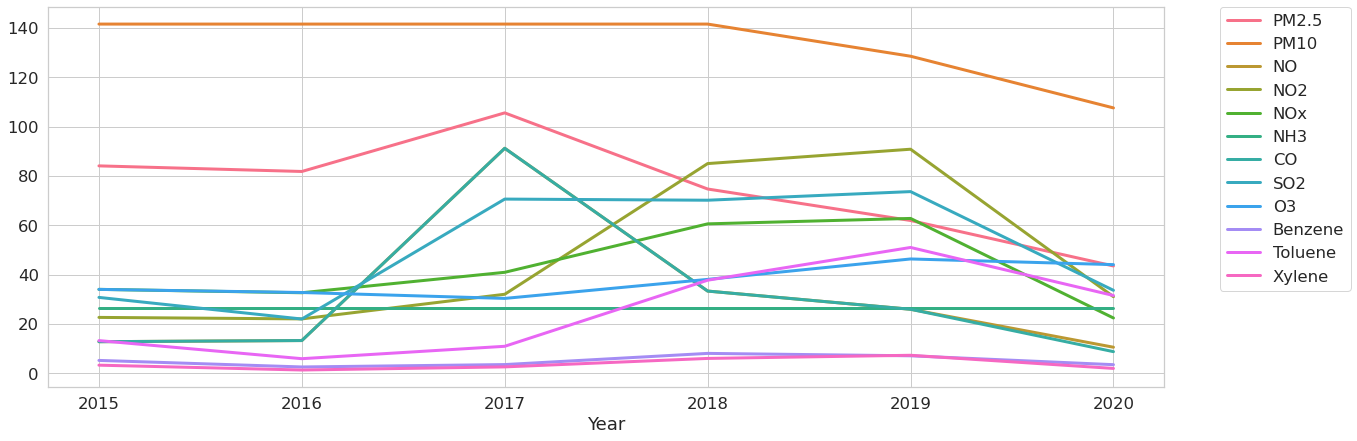

In [27]:
plt.rcParams['figure.figsize'] = [20,7];
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

df_Ahmedabad = dfcity_day[dfcity_day['City'] == 'Ahmedabad']
df_Ahmedabad['Year'] = pd.DatetimeIndex(df_Ahmedabad['Date']).year
df_Ahmedabad['Month'] = pd.DatetimeIndex(df_Ahmedabad['Date']).month
sns.lineplot(data = df_Ahmedabad.groupby('Year').mean().drop(['AQI','Month'],axis=1),dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Delhi Yearly Average Polution data

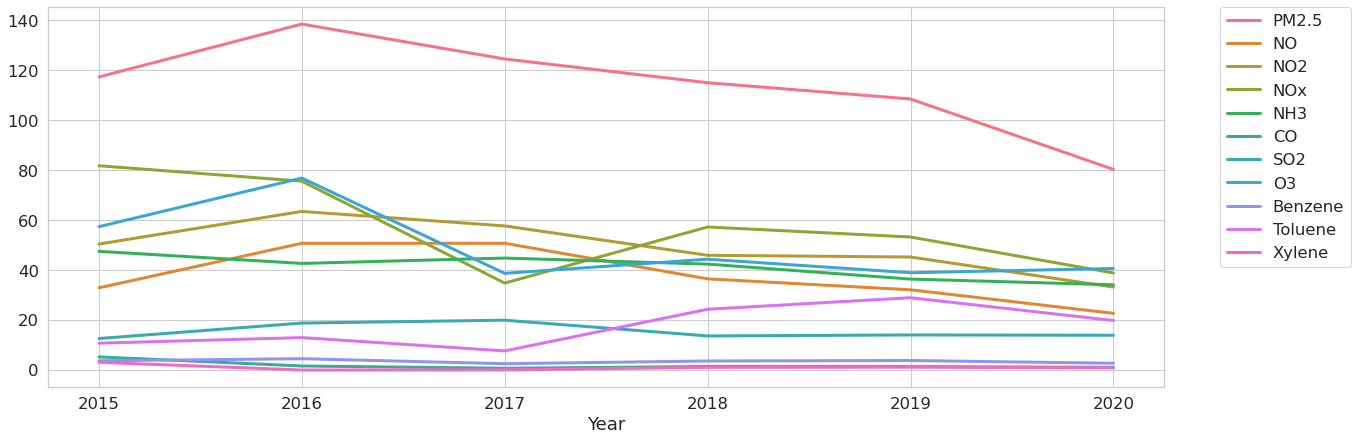

In [28]:
df_Delhi = dfcity_day[dfcity_day['City'] == 'Delhi']
df_Delhi['Year'] = pd.DatetimeIndex(df_Delhi['Date']).year
df_Delhi['Month'] = pd.DatetimeIndex(df_Delhi['Date']).month
sns.lineplot(data = df_Delhi.groupby('Year').mean().drop(['AQI','Month','PM10'],axis=1),dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Mumbai Yearly Average Polution data

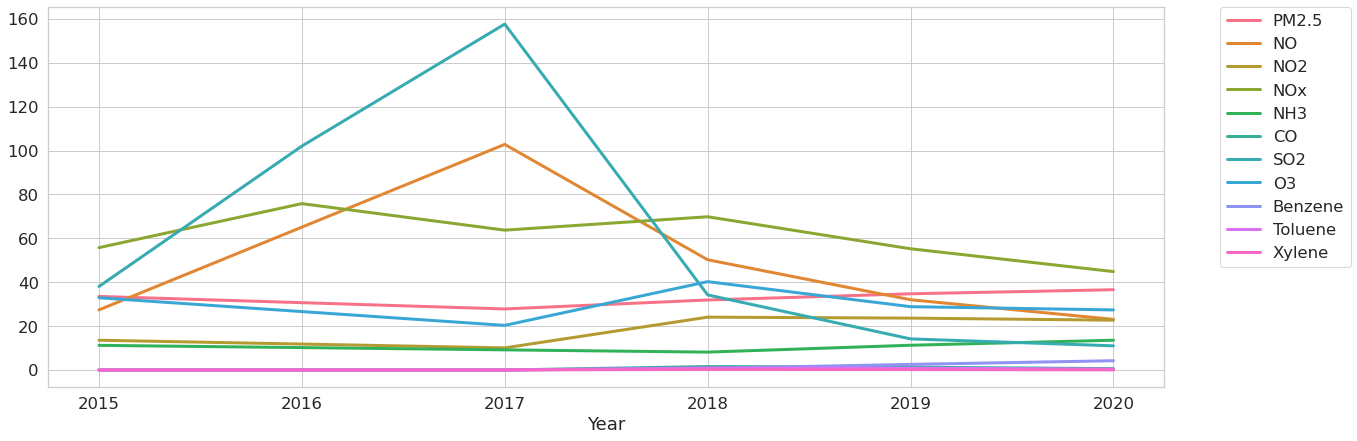

In [29]:
df_Mumbai = dfcity_day[dfcity_day['City'] == 'Mumbai']
df_Mumbai['Year'] = pd.DatetimeIndex(df_Mumbai['Date']).year
df_Mumbai['Month'] = pd.DatetimeIndex(df_Mumbai['Date']).month
sns.lineplot(data = df_Mumbai.groupby('Year').mean().drop(['AQI','Month','PM10'],axis=1),dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Bengaluru Yearly Average Polution data

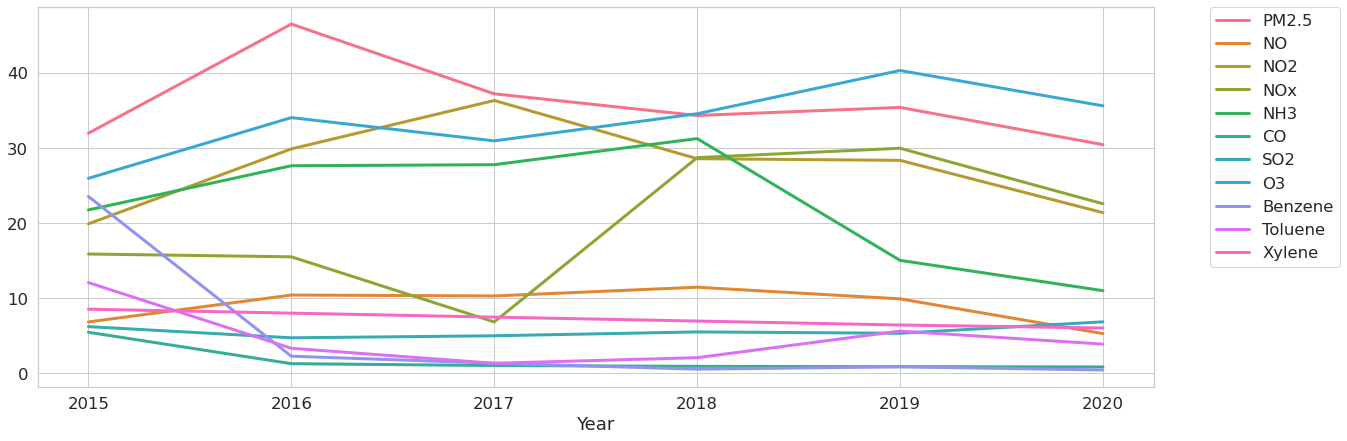

In [30]:
df_Bengaluru = dfcity_day[dfcity_day['City'] == 'Bengaluru']
df_Bengaluru['Year'] = pd.DatetimeIndex(df_Bengaluru['Date']).year
df_Bengaluru['Month'] = pd.DatetimeIndex(df_Bengaluru['Date']).month
sns.lineplot(data = df_Bengaluru.groupby('Year').mean().drop(['AQI','Month','PM10'],axis=1),dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Kolkata Yearly Average Polution data

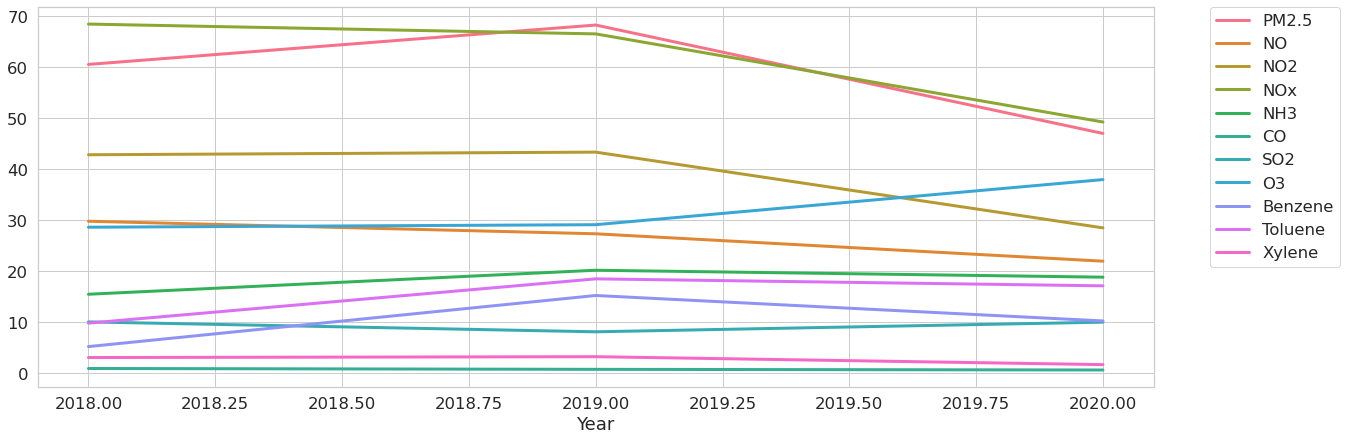

In [31]:
df_Kolkata = dfcity_day[dfcity_day['City'] == 'Kolkata']
df_Kolkata['Year'] = pd.DatetimeIndex(df_Kolkata['Date']).year
df_Kolkata['Month'] = pd.DatetimeIndex(df_Kolkata['Date']).month
sns.lineplot(data = df_Kolkata.groupby('Year').mean().drop(['AQI','Month','PM10'],axis=1),dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Chennai Yearly Average Polution data

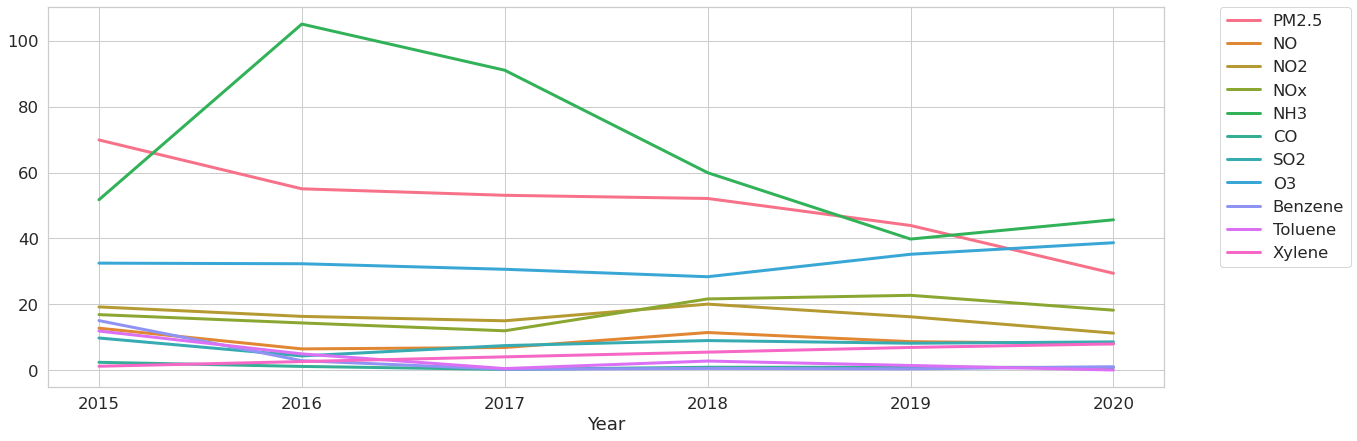

In [32]:
df_Chennai = dfcity_day[dfcity_day['City'] == 'Chennai']
df_Chennai['Year'] = pd.DatetimeIndex(df_Chennai['Date']).year
df_Chennai['Month'] = pd.DatetimeIndex(df_Chennai['Date']).month
sns.lineplot(data = df_Chennai.groupby('Year').mean().drop(['AQI','Month','PM10'],axis=1),dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
<b>   => Each City Data shows different plot for each pollutants PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2,O3, Benzene, Toluene & Xylene.  </b>
<br>
<b>    => In an Average Secenario,  Yearly Mean of each pollutants shows that From Year 2017 Pollution has increased and reduced from 2019 to 2020.(due to COVID 19 Pendemic!!) </b>

### CO levels across Cities and Months

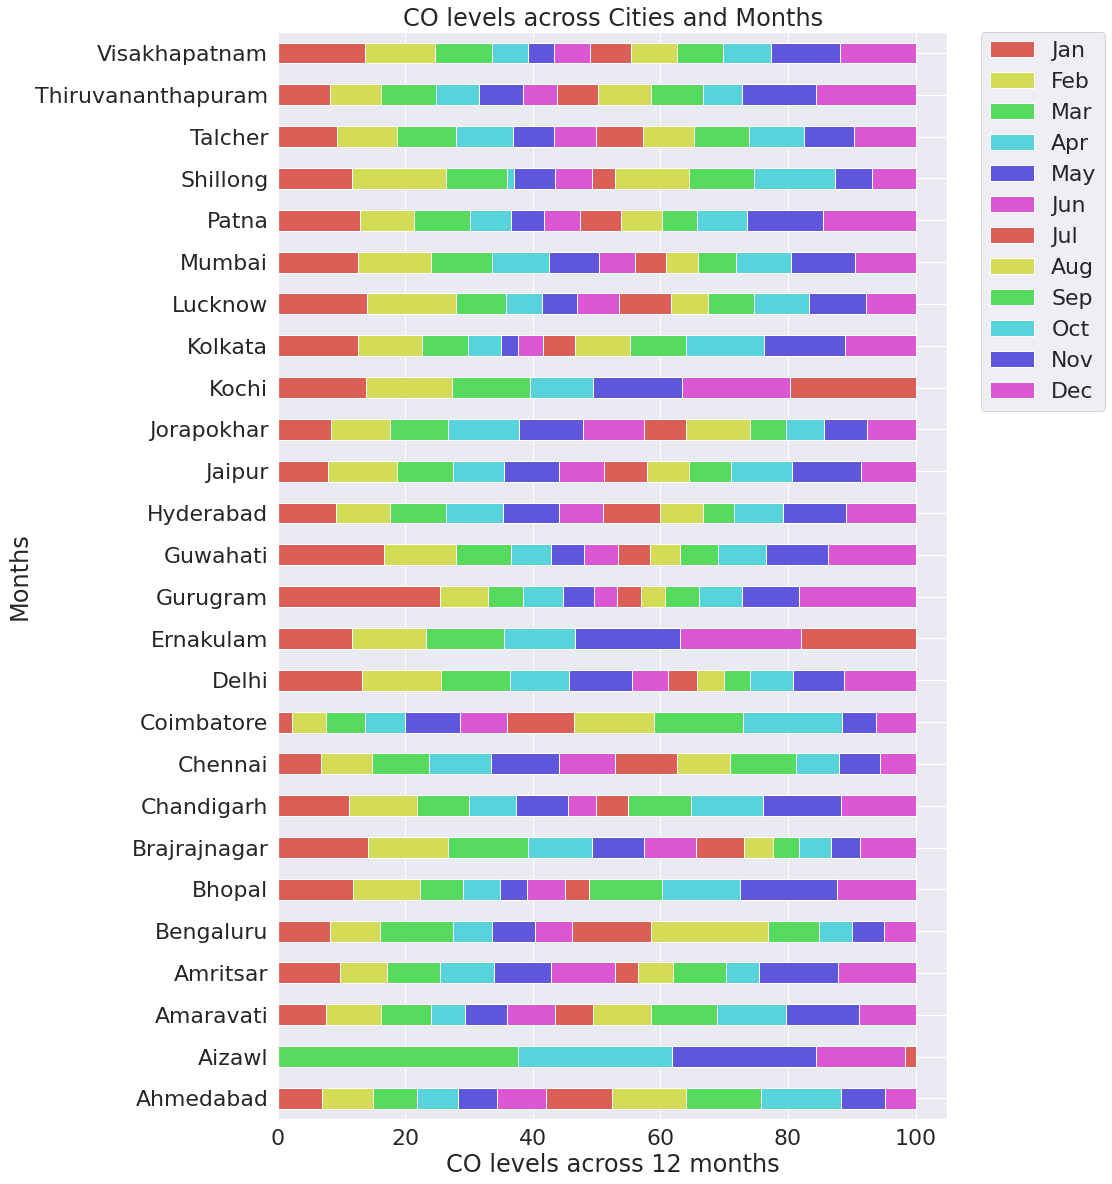

In [33]:
plt.rcParams['figure.figsize'] = (12, 20);
sns.set(palette='hls')
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

dfcity_day['Month'] = pd.DatetimeIndex(dfcity_day['Date']).month
df_city_month_pivot_table = dfcity_day.fillna(0).sort_values(by=['City'], ascending=False) \
                                .pivot_table(values='CO', index='City', columns='Month', aggfunc=np.mean).fillna(0)
df_city_month_pivot_table = df_city_month_pivot_table.apply(lambda x: x*100/sum(x), axis=1)

df_city_month_pivot_table.rename(columns={1:'Jan' ,2:'Feb' ,3:'Mar' ,4:'Apr' ,5:'May' ,6:'Jun',7:'Jul' ,8:'Aug' ,9:'Sep' ,10:'Oct' ,11:'Nov' ,12:'Dec'},inplace = True)

ax = df_city_month_pivot_table.plot(kind='barh', stacked=True, title='CO levels across Cities and Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Months');
ax.set_xlabel('CO levels across 12 months');

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
    => For all given cities, CO level in winter season ( December , January and February ) is more compare to other months data.

### PM2.5 levels across Cities and Months

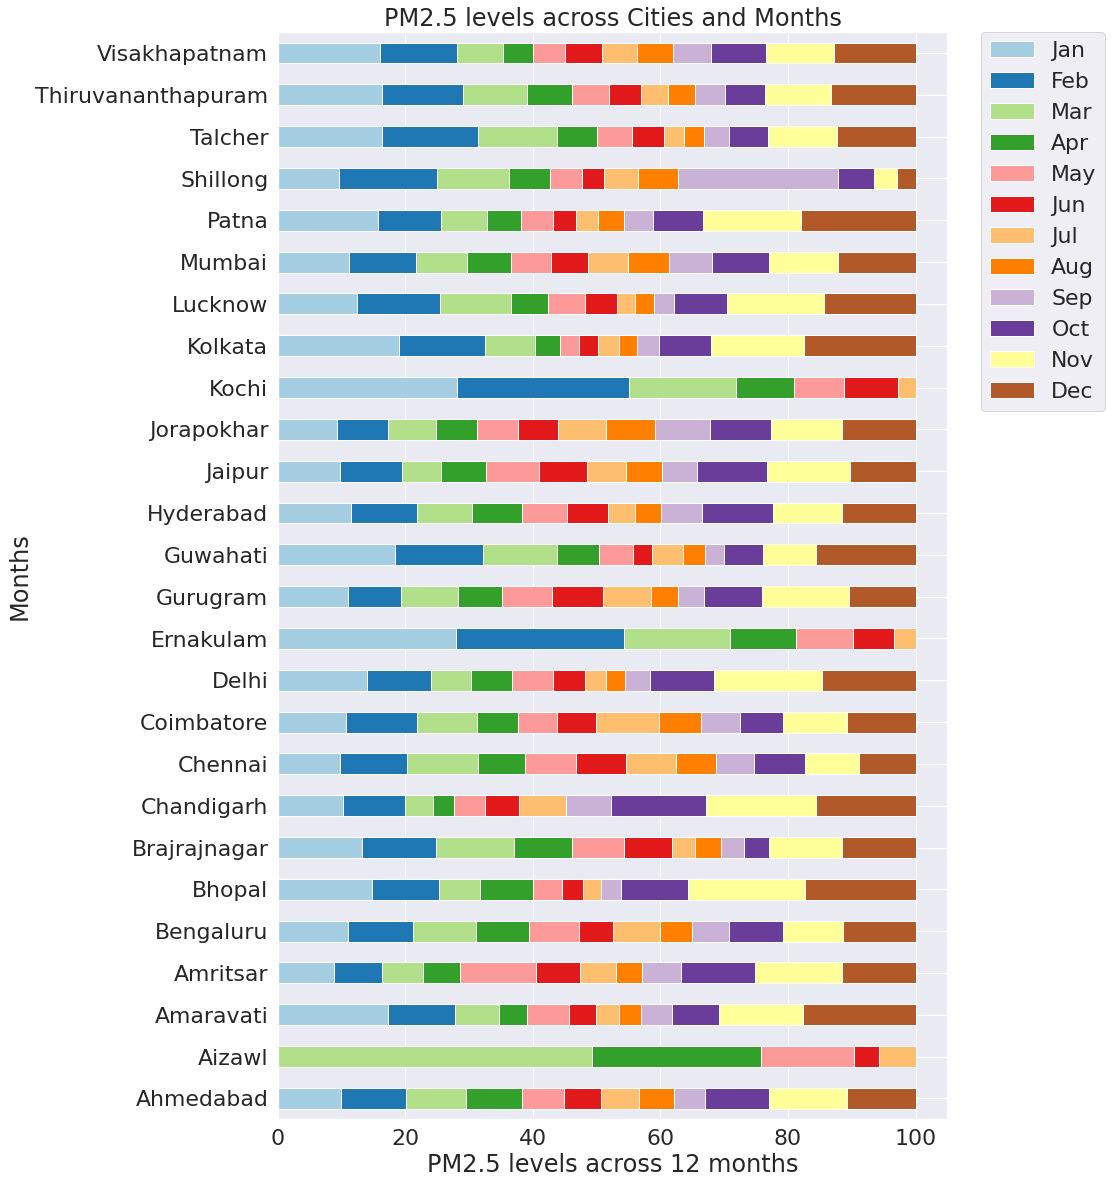

In [34]:
plt.rcParams['figure.figsize'] = (12, 20);
sns.set(palette='Paired')
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

dfcity_day['Month'] = pd.DatetimeIndex(dfcity_day['Date']).month
df_city_month_pivot_table = dfcity_day.fillna(0).sort_values(by=['City'], ascending=False) \
                                .pivot_table(values='PM2.5', index='City', columns='Month', aggfunc=np.mean).fillna(0)
df_city_month_pivot_table = df_city_month_pivot_table.apply(lambda x: x*100/sum(x), axis=1)

df_city_month_pivot_table.rename(columns={1:'Jan' ,2:'Feb' ,3:'Mar' ,4:'Apr' ,5:'May' ,6:'Jun',7:'Jul' ,8:'Aug' ,9:'Sep' ,10:'Oct' ,11:'Nov' ,12:'Dec'},inplace = True)

ax = df_city_month_pivot_table.plot(kind='barh', stacked=True, title='PM2.5 levels across Cities and Months',grid=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Months');
ax.set_xlabel('PM2.5 levels across 12 months');

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
    => For all given cities, PM2.5 level in winter season ( December , January and February ) is also more compare to other months data.

### AQI Bucket and Cities

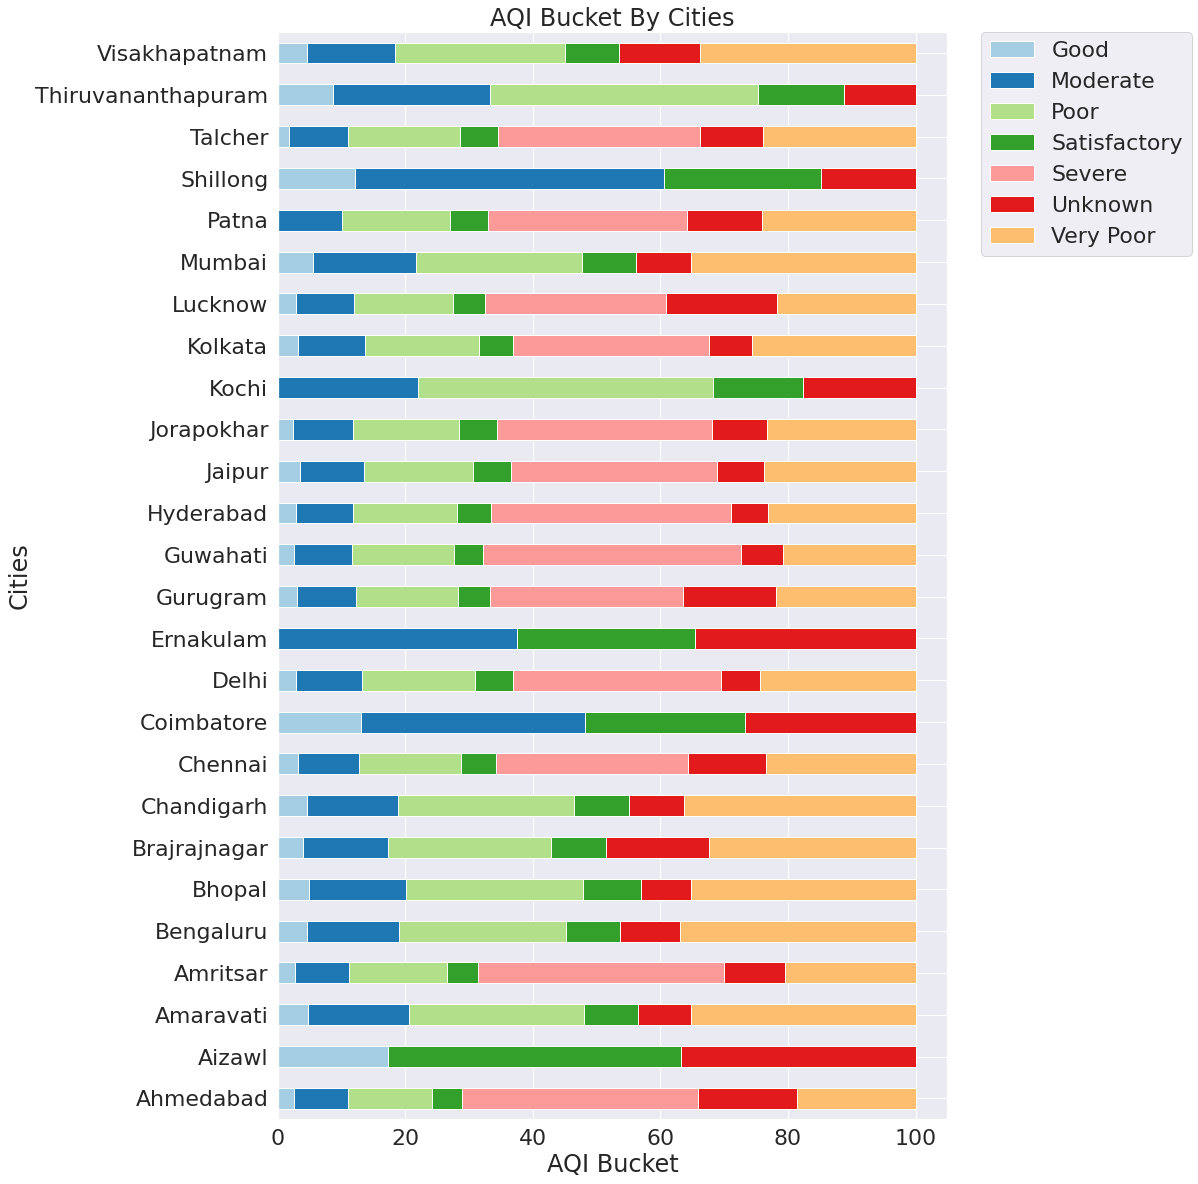

In [35]:
df_city_month_pivot_table = dfcity_day.fillna(0).sort_values(by=['AQI', 'AQI_Bucket'], ascending=False).pivot_table(values='AQI', index='City', columns='AQI_Bucket', aggfunc=np.mean).fillna(0)
plt.rcParams['figure.figsize'] = (12, 20)
ax = df_city_month_pivot_table.apply(lambda x: x*100/sum(x), axis=1).plot(kind='barh', stacked=True, title='AQI Bucket By Cities')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Cities');
ax.set_xlabel('AQI Bucket');

### AQ Acceptability and Cities: listed by Acceptable AQ

In [36]:
def AQ_acceptability(aqi_bucket):
    results = []
    for each_aqi_bucket in aqi_bucket.values:
        result = "Acceptable" if each_aqi_bucket in ["Good", "Satisfactory"] else "Unacceptable"
        results.append(result)
    return results

dfcity_day['AQ_acceptability'] = AQ_acceptability(dfcity_day['AQI_Bucket'])

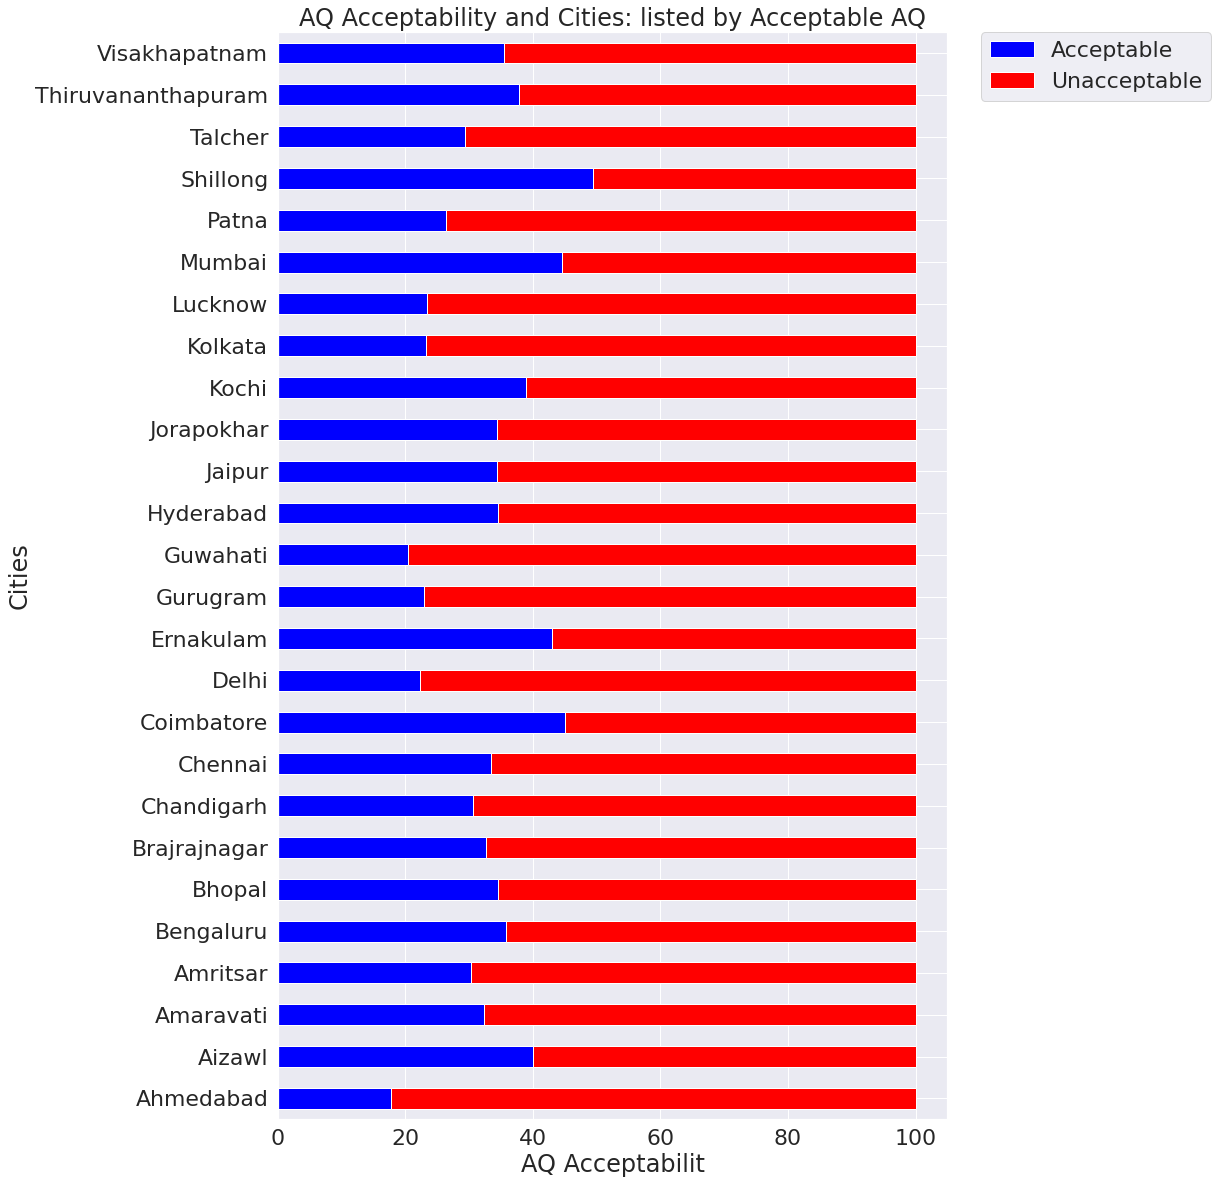

In [37]:
df_city_month_pivot_table = dfcity_day.fillna(0).sort_values(by=['AQI', 'AQ_acceptability'], ascending=False).pivot_table(values='AQI', index='City', columns='AQ_acceptability', aggfunc=np.mean).fillna(0)
plt.rcParams['figure.figsize'] = (12, 20)
ax = df_city_month_pivot_table.apply(lambda x: x*100/sum(x), axis=1).plot(kind='barh', stacked=True, title='AQ Acceptability and Cities: listed by Acceptable AQ',colormap='bwr')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Cities');
ax.set_xlabel('AQ Acceptabilit');

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
<b>   -> AQ Acceptability and cities shows that Metro(Major) cities like Delhi, Mumbai, Ahmedabad, Chennai are under Unacceptable category of Air Quality !!!  </b>
<br>

### Weekday vs Weekend Polution

In [38]:
dfcity_day['Day'] = pd.to_datetime(dfcity_day['Date']).dt.day_name()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#### Ahmedabad Day Wise Pollution 

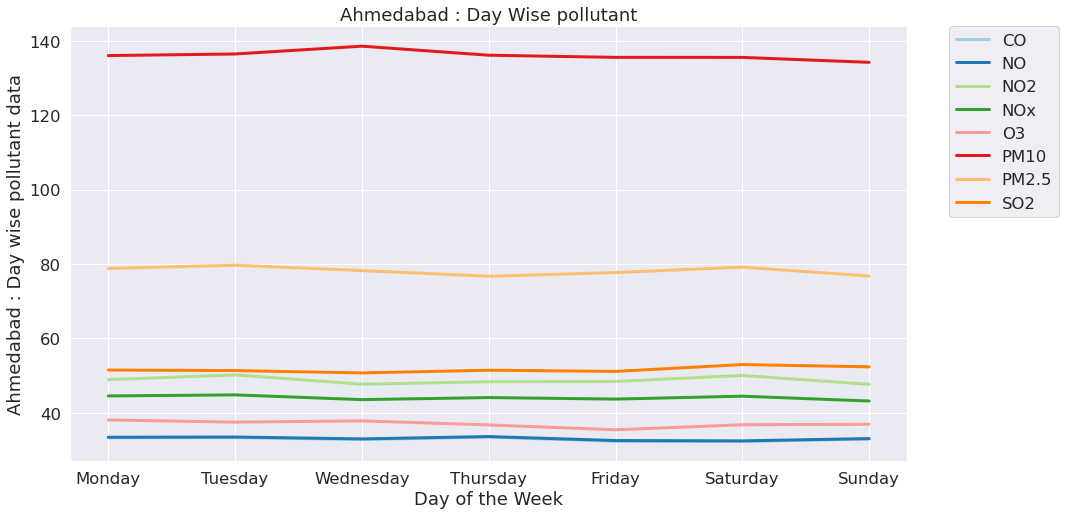

In [39]:
plt.rcParams['figure.figsize'] = (15, 8);                                 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

dfAhmedabad = dfcity_day[dfcity_day['City'] == 'Ahmedabad']
ax = dfAhmedabad.groupby('Day').mean().reindex(cats).drop('AQI',axis=1).plot(kind = 'line',y=['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','SO2'],title = 'Ahmedabad : Day Wise pollutant')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Ahmedabad : Day wise pollutant data');
ax.set_xlabel('Day of the Week');

#### Delhi Day Wise Pollution 

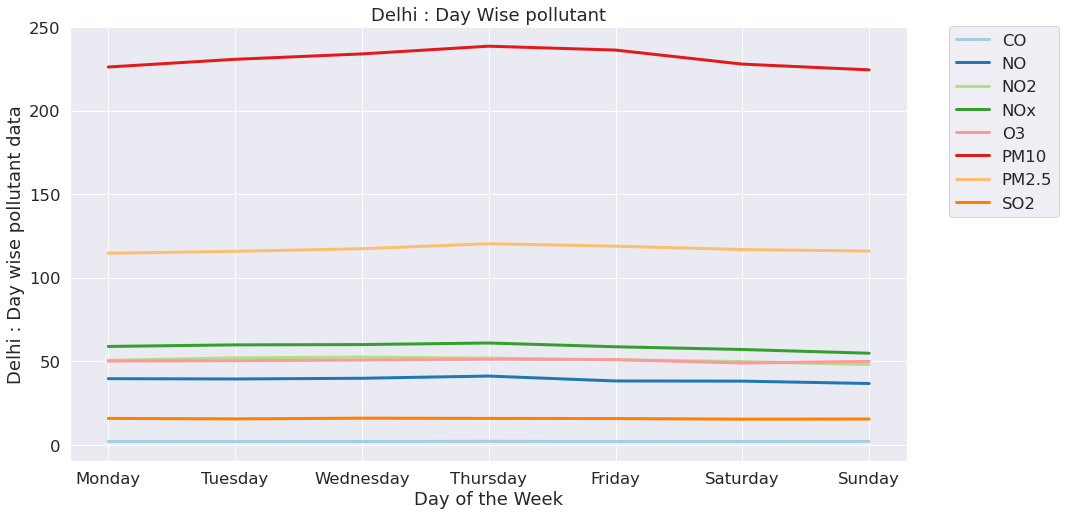

In [40]:
plt.rcParams['figure.figsize'] = (15, 8);                                 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

dfDelhi = dfcity_day[dfcity_day['City'] == 'Delhi']
ax = dfDelhi.groupby('Day').mean().reindex(cats).drop('AQI',axis=1).plot(kind = 'line',y=['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','SO2'],title = 'Delhi : Day Wise pollutant')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Delhi : Day wise pollutant data');
ax.set_xlabel('Day of the Week');

#### Mumbai Day Wise Pollution 

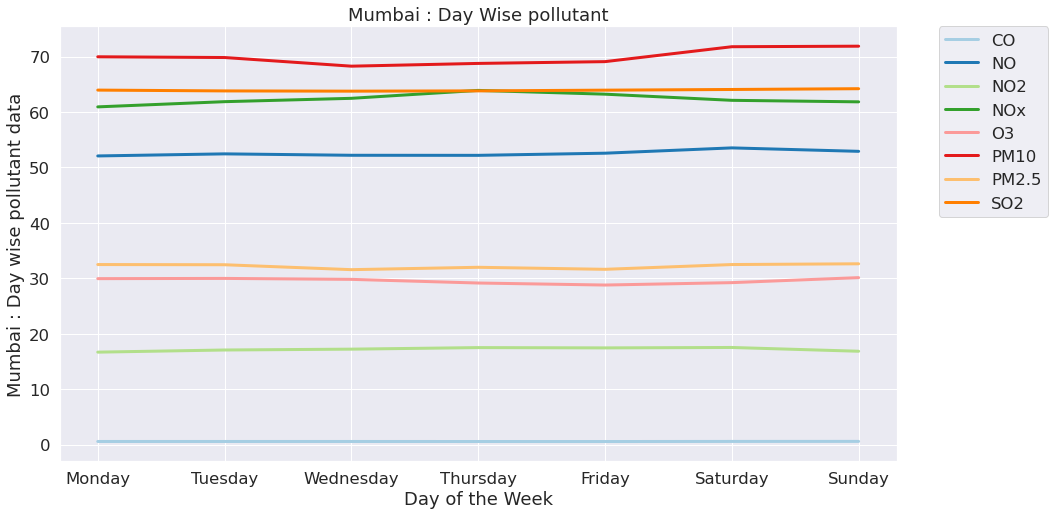

In [41]:
plt.rcParams['figure.figsize'] = (15, 8);                                 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

dfMumbai = dfcity_day[dfcity_day['City'] == 'Mumbai']
ax = dfMumbai.groupby('Day').mean().reindex(cats).drop('AQI',axis=1).plot(kind = 'line',y=['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','SO2'],title = 'Mumbai : Day Wise pollutant')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Mumbai : Day wise pollutant data');
ax.set_xlabel('Day of the Week');

#### Bengaluru Day Wise Pollution 

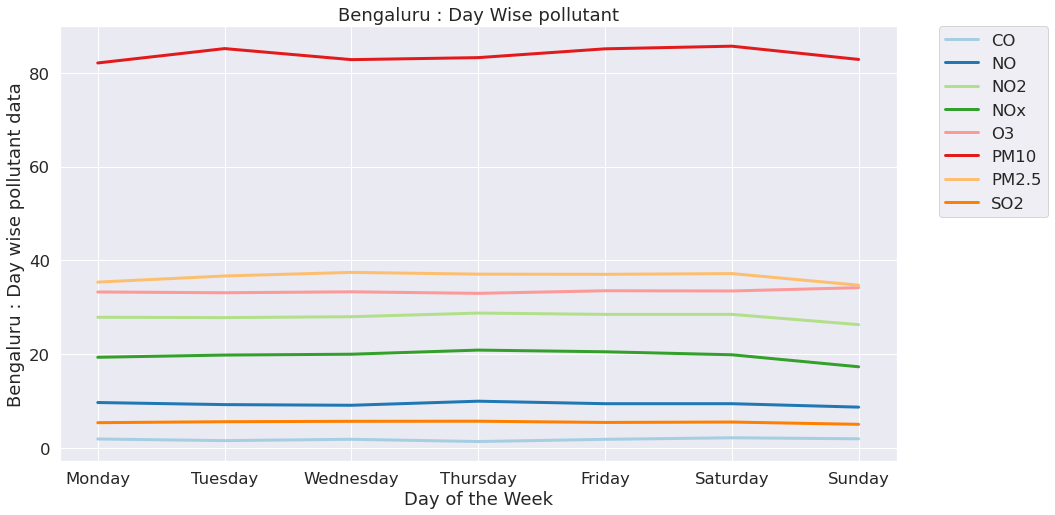

In [42]:
plt.rcParams['figure.figsize'] = (15, 8);                                 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

dfBengaluru = dfcity_day[dfcity_day['City'] == 'Bengaluru']
ax = dfBengaluru.groupby('Day').mean().reindex(cats).drop('AQI',axis=1).plot(kind = 'line',y=['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','SO2'],title = 'Bengaluru : Day Wise pollutant')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

ax.set_ylabel('Bengaluru : Day wise pollutant data');
ax.set_xlabel('Day of the Week');

#### Kolkata  Day Wise Pollution 

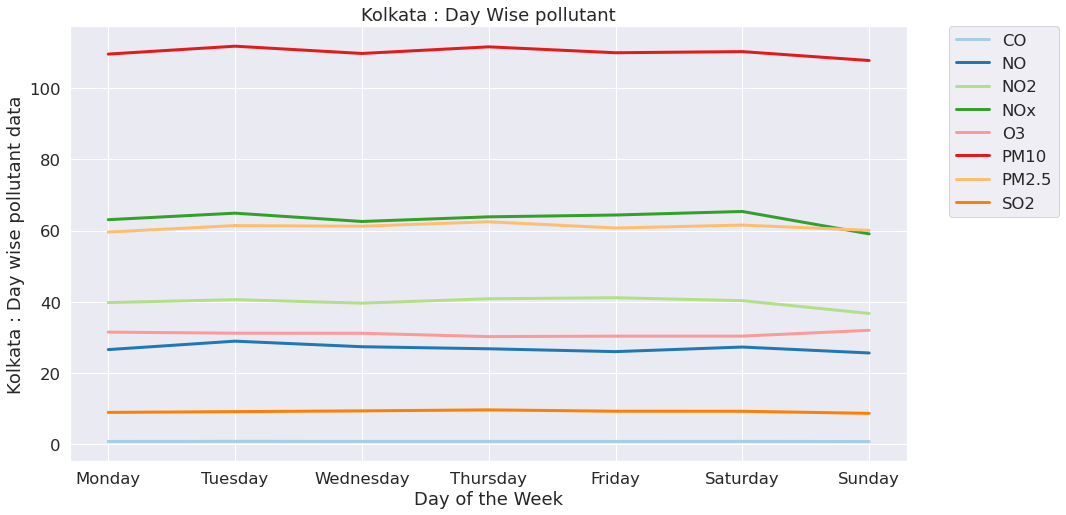

In [43]:
plt.rcParams['figure.figsize'] = (15, 8);                                 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

dfKolkata = dfcity_day[dfcity_day['City'] == 'Kolkata']
ax = dfKolkata.groupby('Day').mean().reindex(cats).drop('AQI',axis=1).plot(kind = 'line',y=['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','SO2'],title = 'Kolkata : Day Wise pollutant')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Kolkata : Day wise pollutant data');
ax.set_xlabel('Day of the Week');

#### Chennai Day Wise Pollution 

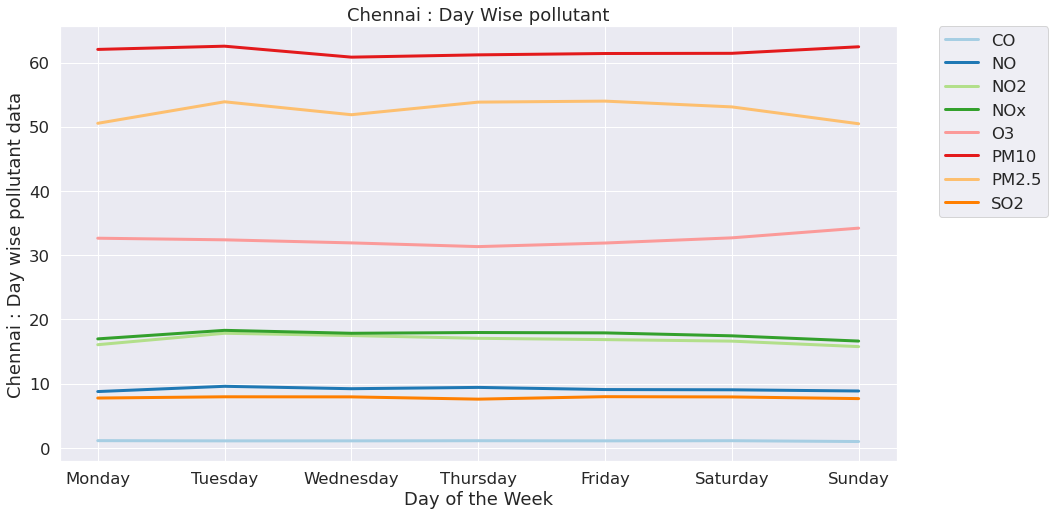

In [44]:
plt.rcParams['figure.figsize'] = (15, 8);                                 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

dfChennai = dfcity_day[dfcity_day['City'] == 'Chennai']
ax = dfChennai.groupby('Day').mean().reindex(cats).drop('AQI',axis=1).plot(kind = 'line',y=['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5','SO2'],title = 'Chennai : Day Wise pollutant')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_ylabel('Chennai : Day wise pollutant data');
ax.set_xlabel('Day of the Week');

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
=> Above Weekdays vs Weekend Pollution data graphs shows that generally pollutant readings decreases in weekend.(specially PM10)

#### COVID-19 Effect : Januray 2020 and April 2020 'CO' Data Check

In [45]:
df_CO = dfcity_day.pivot(index='Date', columns='City', values='CO')
df_CO = df_CO.fillna(df_CO.mean())
dfCO_Apr2020 = df_CO.loc['2020-04-01':'2020-04-30']
dfCO_Jan2020 = df_CO.loc['2020-01-01':'2020-01-30']

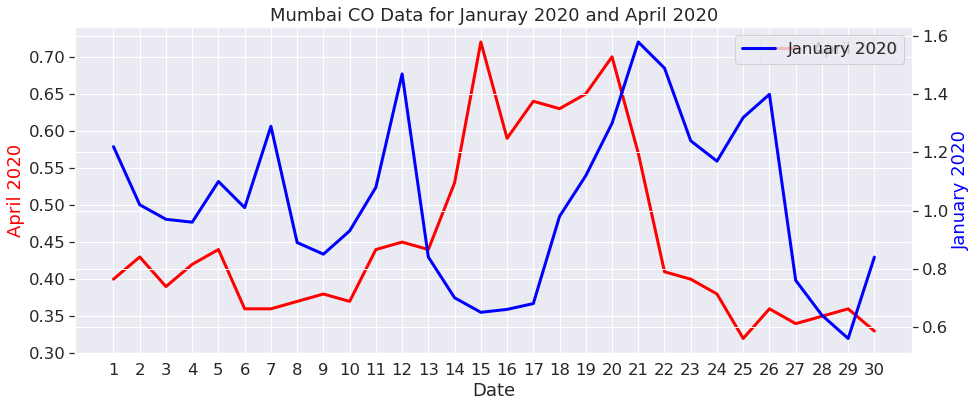

In [46]:
sns.set(palette='Paired');
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3});
fig, ax = plt.subplots(figsize = (15,6));
sns.lineplot(dfCO_Apr2020.index,dfCO_Apr2020['Mumbai'],ax=ax,color='red');
ax.legend(['April 2020']);
ax.set_ylabel('April 2020',color='red')

ax2 = ax.twinx()
sns.lineplot(dfCO_Jan2020.index,dfCO_Jan2020['Mumbai'],ax=ax2,color='blue');
ax2.legend(['January 2020']);
ax2.set_xticklabels(labels=range(1,31), rotation=0, ha='right');
ax2.set_ylabel('January 2020',color='blue')

plt.title('Mumbai CO Data for Januray 2020 and April 2020');


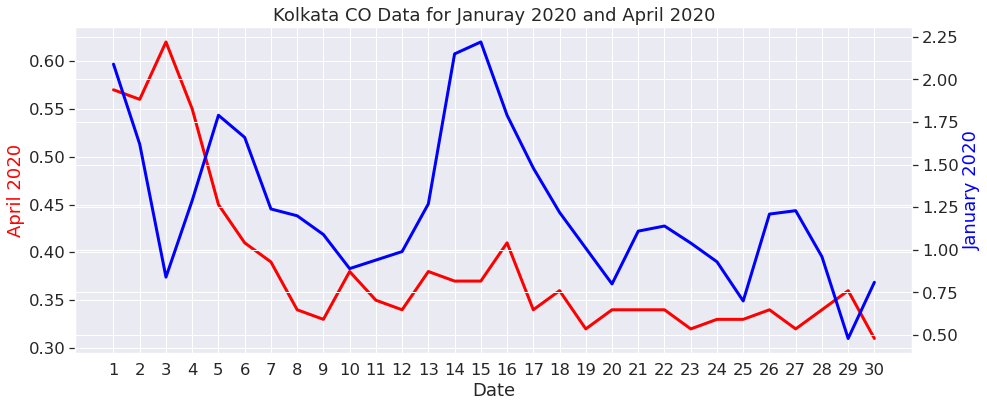

In [47]:
sns.set(palette='Paired');
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3});
fig, ax = plt.subplots(figsize = (15,6));
sns.lineplot(dfCO_Apr2020.index,dfCO_Apr2020['Kolkata'],ax=ax,color='red');
ax.set_ylabel('April 2020',color='red')

ax2 = ax.twinx()
sns.lineplot(dfCO_Jan2020.index,dfCO_Jan2020['Kolkata'],ax=ax2,color='blue');
ax2.set_xticklabels(labels=range(1,31), rotation=0, ha='right');
ax2.set_ylabel('January 2020',color='blue')

plt.title('Kolkata CO Data for Januray 2020 and April 2020');

<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
=> Mumbai and Kolkata 'CO' Data readings for Januray 2020 and April 2020 months shows considerable reduction in values, One the major reasons could be COVID-19.  
<r>
=>Similarly other Cities data also can be explored.

#### COVID-19 Effect : Januray 2020 and April 2020 'PM2.5' Data Check

In [48]:
df_PM25 = dfcity_day.pivot(index='Date', columns='City', values='PM2.5')
df_PM25 = df_PM25.fillna(df_PM25.mean())
dfPM25_Apr2020 = df_PM25.loc['2020-04-01':'2020-04-30']
dfPM25_Jan2020 = df_PM25.loc['2020-01-01':'2020-01-30']

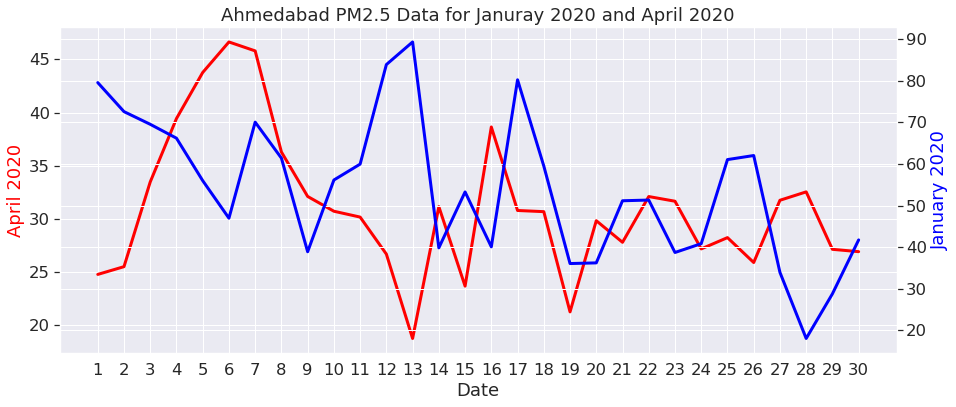

In [49]:
sns.set(palette='Paired');
sns.set_context("notebook", font_scale= 1.5, rc={"lines.linewidth": 3});
fig, ax = plt.subplots(figsize = (15,6));
sns.lineplot(dfPM25_Apr2020.index,dfPM25_Apr2020['Ahmedabad'],ax=ax,color='red');
ax.set_ylabel('April 2020',color='red')

ax2 = ax.twinx()
sns.lineplot(dfPM25_Jan2020.index,dfPM25_Jan2020['Ahmedabad'],ax=ax2,color='blue');
ax2.set_xticklabels(labels=range(1,31), rotation=0, ha='right');
ax2.set_ylabel('January 2020',color='blue')

plt.title('Ahmedabad PM2.5 Data for Januray 2020 and April 2020');


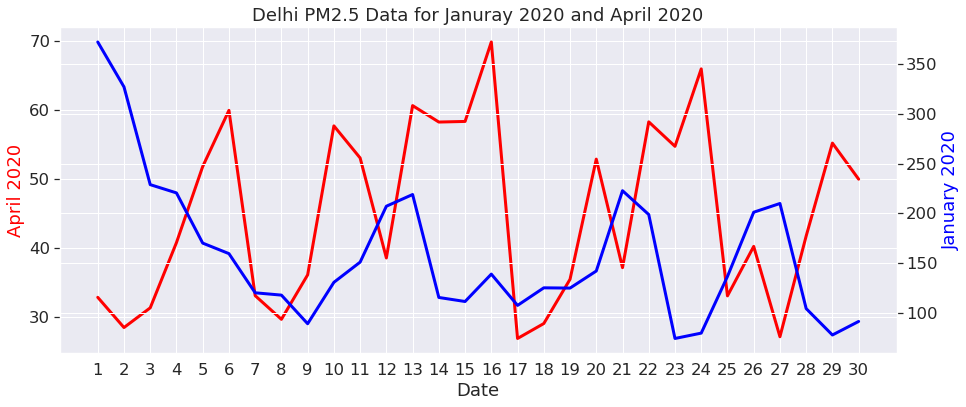

In [50]:
sns.set(palette='Paired');
sns.set_context("notebook", font_scale= 1.5, rc={"lines.linewidth": 3});
fig, ax = plt.subplots(figsize = (15,6));
sns.lineplot(dfPM25_Apr2020.index,dfPM25_Apr2020['Delhi'],ax=ax,color='red');
ax.set_ylabel('April 2020',color='red')

ax2 = ax.twinx()
sns.lineplot(dfPM25_Jan2020.index,dfPM25_Jan2020['Delhi'],ax=ax2,color='blue');
ax2.set_xticklabels(labels=range(1,31), rotation=0, ha='right');
ax2.set_ylabel('January 2020',color='blue')

plt.title('Delhi PM2.5 Data for Januray 2020 and April 2020');


<i><p style="font-size:16px; background-color: #FFFF20; border: 3px solid blue; margin: 20px; padding: 10px;"> 
=> Ahmedabad and Delhi 'PM2.5' Data readings for Januray 2020 and April 2020 months shows considerable reduction in values, One the major reasons could be COVID-19.  
<r>
=>Similarly other Cities data also can be explored.